In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [30]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [31]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [32]:
#read in the general csv too
df_general  = pd.read_csv("/data/project/thymelab/october_2024_hcrtr2_discovery_results/best_placements_for_pymol/agonist_real_delta_scores.csv")

In [33]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [34]:
len(df_general)

2973411

In [35]:
df_general

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
0,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_107_1.pdb,-9.867297,-11.686262,1.818965,6.0,12.0,-6.0,3.0,2.0,1.0,0.5,0.083333,0.416667,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,102.397071,-102.358261,2.783601,0.4,NaN
1,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_104_10.pdb,-9.867297,-11.590167,1.722870,6.0,7.0,-1.0,3.0,2.0,1.0,0.5,0.428571,0.071429,1,1,0.0,-0.273155,-0.364758,0.091603,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,98.473646,-98.434836,5.944654,0.4,NaN
2,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_27_5.pdb,-9.867297,-9.252565,-0.614732,6.0,10.0,-4.0,3.0,3.0,0.0,0.5,0.300000,0.200000,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,104.047435,-104.008625,4.622837,0.2,NaN
3,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_11_11.pdb,-9.867297,-11.492976,1.625679,6.0,8.0,-2.0,3.0,3.0,0.0,0.5,0.250000,0.250000,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,99.757024,-99.718214,4.141413,0.4,NaN
4,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_55_17.pdb,-9.867297,-11.231446,1.364149,6.0,12.0,-6.0,3.0,4.0,-1.0,0.5,0.250000,0.250000,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,105.018554,-104.979744,7.457515,0.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976551,/scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z993458444/placements/7l1u_receptor_only_Z993458444_180_0.pdb,-11.053889,-9.364106,-1.689783,6.0,7.0,-1.0,2.0,2.0,0.0,0.5,0.571429,-0.071429,1,1,0.0,-0.651695,-0.441124,-0.210571,3.245163,100,-96.754837,-7.2,0,-7.2,6.765364,0,6.765364,0.604942,100.766199,-100.161257,1.447019,0.4,NaN
2976552,/scratch/abgvg9/discovery_res

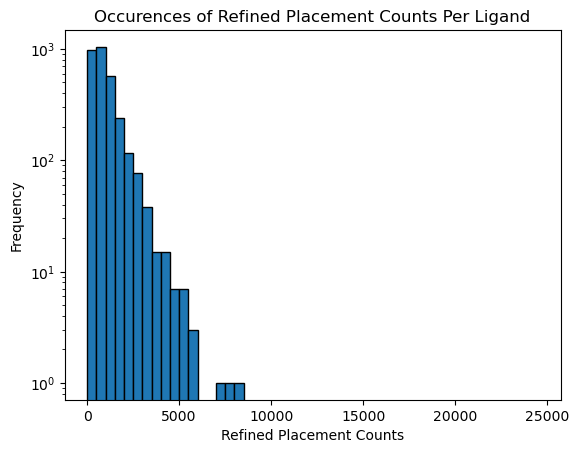

In [37]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_general['file_initial'].value_counts()

bin_edges = np.arange(0, 25000, 500)

plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Refined Placement Counts')
plt.ylabel('Frequency')
plt.title('Occurences of Refined Placement Counts Per Ligand')

# Show the plot
plt.show()

In [28]:
# Extract ligand names using a regular expression
df_general['ligand_name'] = df_general['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands_general = df_general['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 2983


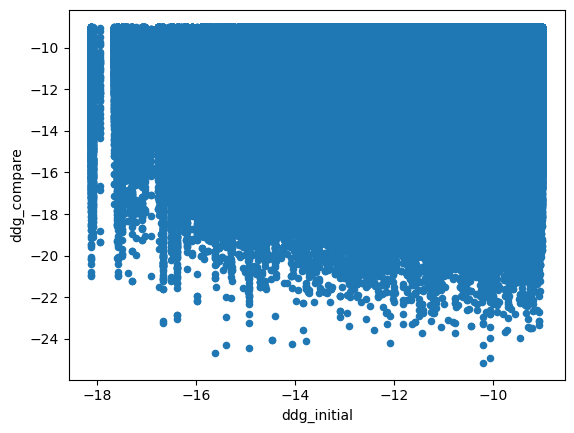

In [7]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

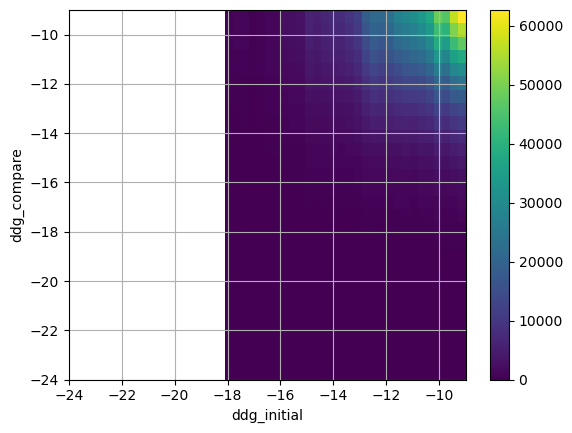

In [10]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

#plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')

plt.colorbar()

plt.ylim(-24,-9)
plt.xlim(-24,-9)

plt.grid(True)
plt.show()

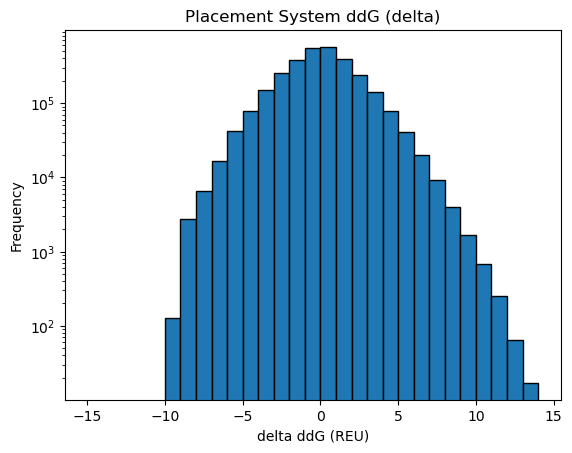

In [44]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-15, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

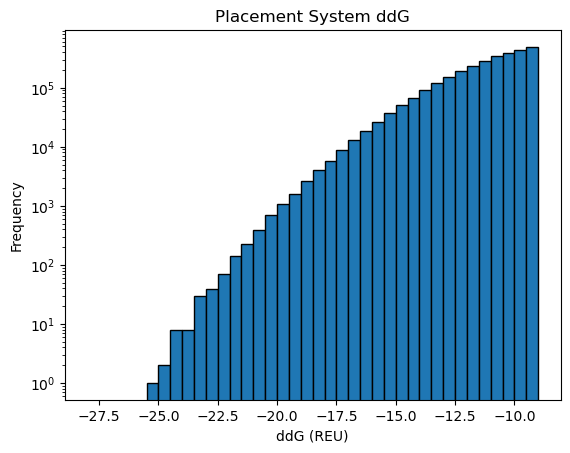

In [43]:
#plot the delta ddg in histogram
x = df_general['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

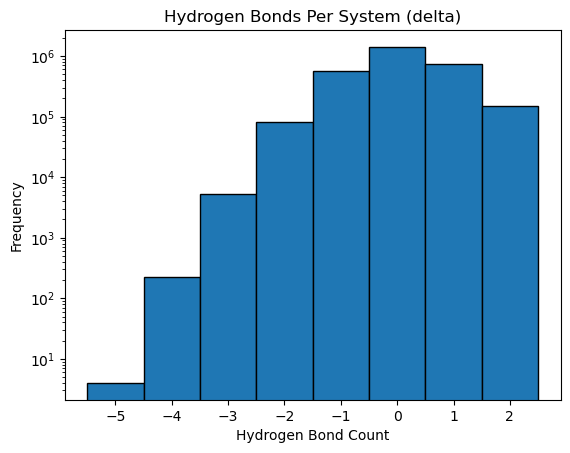

In [45]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

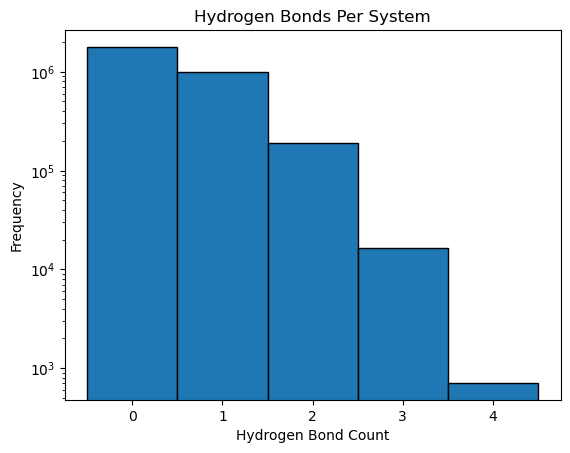

In [52]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

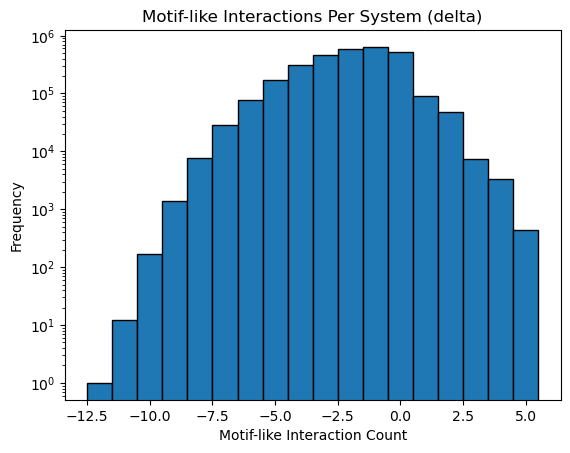

In [48]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

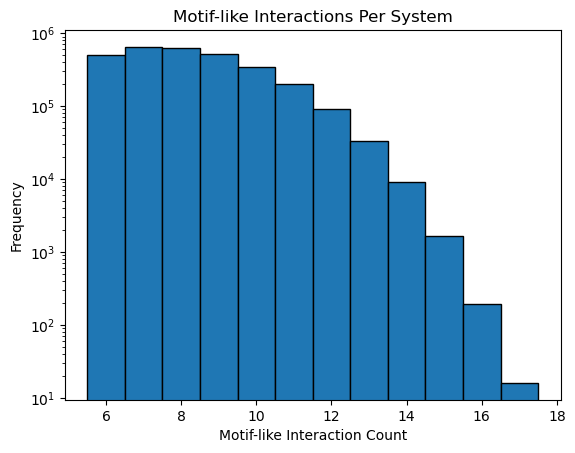

In [53]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

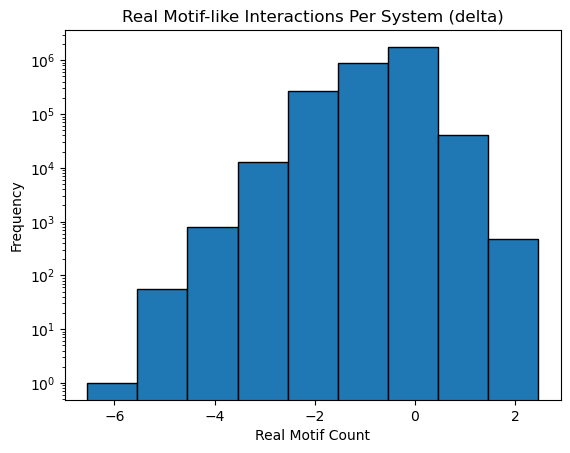

In [51]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta'] * df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

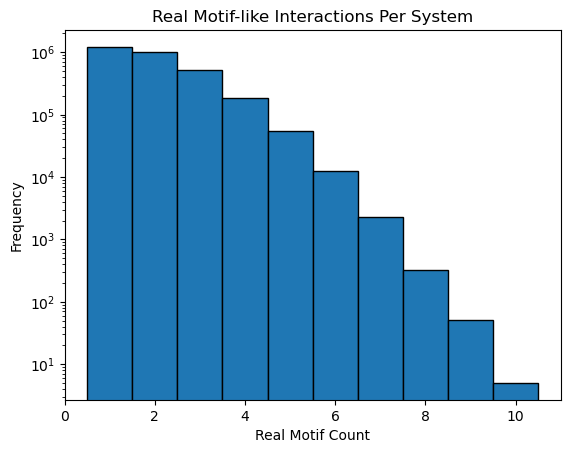

In [54]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare'] * df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

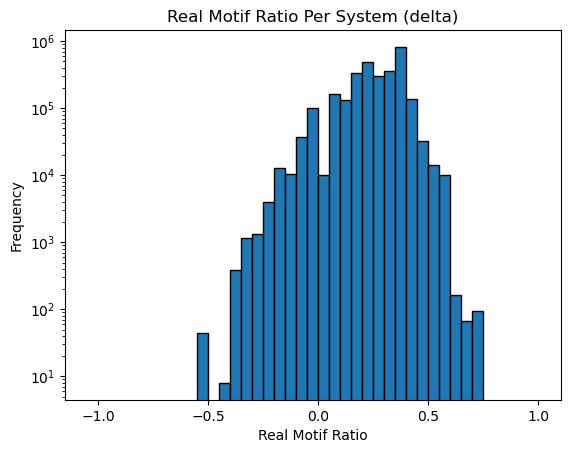

In [50]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

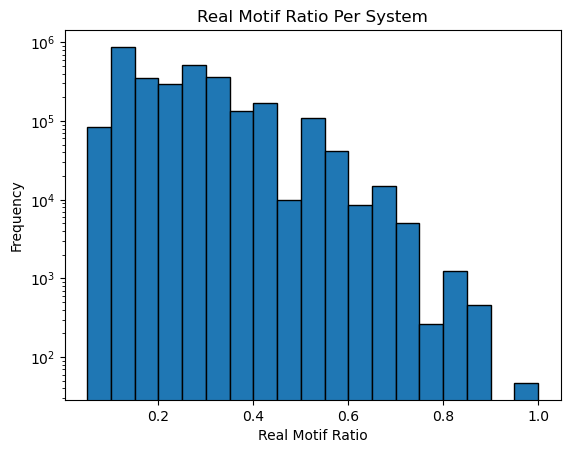

In [55]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

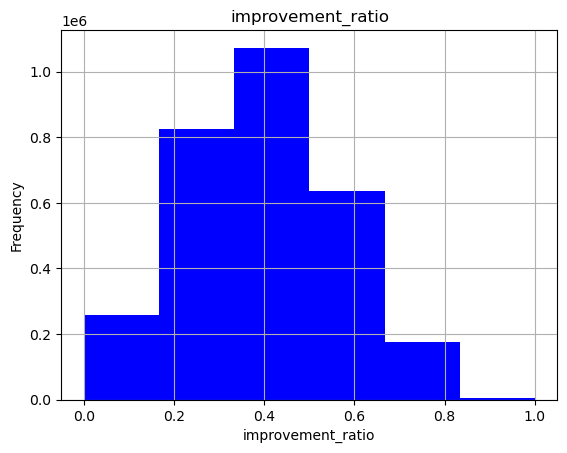

In [10]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [11]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 6) & (df_general['real_motif_ratio_compare'] >= 0.5) & (df_general['ddg_delta'] > -100) & (df_general['ddg_compare'] <= -7)]

In [12]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
44461,/scratch/abgvg9/discovery_results/top_1000_placement/3136/placements/7l1u_receptor_only_PV-000516605266_4_4.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000516605266/placements/7l1u_receptor_only_PV-000516605266_67_4.pdb,-11.654044,-10.916252,-0.737792,6.0,8.0,-2.0,3.0,1.0,2.0,0.5,0.625000,-0.125000,1,3,-2.0,-1.171150,-0.837535,-0.333615,1.332220,100,-98.667780,-9.0,0,-9.0,2.586214,0,2.586214,-7.406760,100.871213,-108.277973,4.086595,0.6,NaN
62865,/scratch/abgvg9/discovery_results/top_1000_placement/4274/placements/7l1u_receptor_only_PV-000576770260_15_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000576770260/placements/7l1u_receptor_only_PV-000576770260_91_7.pdb,-9.212667,-13.634977,4.422310,6.0,6.0,0.0,3.0,2.0,1.0,0.5,0.500000,0.000000,1,3,-2.0,-1.259100,-2.549840,1.290740,1.755228,100,-98.244772,-8.7,0,-8.7,10.977489,0,10.977489,4.060949,95.315183,-91.254234,4.908382,0.4,NaN
64896,/scratch/abgvg9/discovery_results/top_1000_placement/7742/placements/7l1u_receptor_only_PV-000579798243_13_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000579798243/placements/7l1u_receptor_only_PV-000579798243_46_3.pdb,-12.166059,-12.078260,-0.087799,6.0,7.0,-1.0,3.0,3.0,0.0,0.5,0.714286,-0.214286,3,3,0.0,-2.838486,-2.817782,-0.020704,1.787186,100,-98.212814,-8.0,0,-8.0,4.040523,0,4.040523,-4.676835,98.818244,-103.495079,0.197707,0.4,NaN
65036,/scratch/abgvg9/discovery_results/top_1000_placement/7742/placements/7l1u_receptor_only_PV-000579798243_13_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000579798243/placements/7l1u_receptor_only_PV-000579798243_46_1.pdb,-12.166059,-11.522992,-0.643067,6.0,7.0,-1.0,3.0,3.0,0.0,0.5,0.714286,-0.214286,3,3,0.0,-2.838486,-2.635149,-0.203337,1.787186,100,-98.212814,-8.0,0,-8.0,4.040523,0,4.040523,-4.676835,99.556145,-104.232980,0.167958,0.4,NaN
78829,/scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_7.pdb,-13.255910,-17.328808,4.072898,6.0,7.0,-1.0,2.0,2.0,0.0,0.5,0.571429,-0.071429,1,3,-2.0,-0.536478,-1.965986,1.429508,1.925098,100,-98.074902,-8.0,0,-8.0,7.013526,0,7.013526,-3.353764,93.276635,-96.630399,2.188407,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969264,/scratch/abgvg9/discovery_results/top_1000_placement/460/placements/7l1u_receptor_only_Z87917953_9_9.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z87917953/placements/7l1u_receptor_only_Z87917953_215_6.pdb,-15.052371,-10.159331,-4.893040,6.0,8.0,-2.0,2.0,3.0,-1.0,0.5,0.625000,-0.125000,1,3,-2.0,-0.557503,-2.301330,1.743827,1.514763,100,-98.485237,-7.1,0,-7.1,4.477285,0,4.477285,-7.217826,102.164339,-109.382165,2.802966,0.8,NaN
2969829,

In [13]:
len(df_general_filtered)

1463

In [14]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [15]:
df_general_filtered_lite

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
116,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_38_52.pdb,-9.867297,-13.877032,4.009735,6.0,10.0,-4.0,3.0,2.0,1.0,0.5,0.500000,0.000000,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,98.622968,-98.584158,5.945794,0.4,NaN
194,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_8_0.pdb,-9.867297,-9.469164,-0.398133,6.0,8.0,-2.0,3.0,3.0,0.0,0.5,0.500000,0.000000,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,102.030836,-101.992026,5.625204,0.2,NaN
240,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_194_8.pdb,-9.867297,-12.912624,3.045327,6.0,7.0,-1.0,3.0,3.0,0.0,0.5,0.571429,-0.071429,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,97.658805,-97.619995,4.799664,0.6,NaN
271,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_157_4.pdb,-9.867297,-11.570759,1.703462,6.0,8.0,-2.0,3.0,2.0,1.0,0.5,0.500000,0.000000,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,98.929241,-98.890431,6.230973,0.4,NaN
272,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_117_35.pdb,-9.867297,-11.160659,1.293362,6.0,8.0,-2.0,3.0,2.0,1.0,0.5,0.500000,0.000000,1,0,1.0,-0.273155,0.000000,-0.273155,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,99.339341,-99.300531,4.275363,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976514,/scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z993458444/placements/7l1u_receptor_only_Z993458444_85_0.pdb,-11.053889,-9.560468,-1.493421,6.0,7.0,-1.0,2.0,2.0,0.0,0.5,0.571429,-0.071429,1,0,1.0,-0.651695,0.000000,-0.651695,3.245163,100,-96.754837,-7.2,0,-7.2,6.765364,0,6.765364,0.604942,100.010961,-99.406019,7.994507,0.4,NaN
2976531,/scratch/abgvg9/discovery_res

In [16]:
len(df_general_filtered_lite)

180806

In [17]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [18]:
len(df_recoveries)

15765

In [19]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [20]:
len(closest_recovery_general_df)

3118

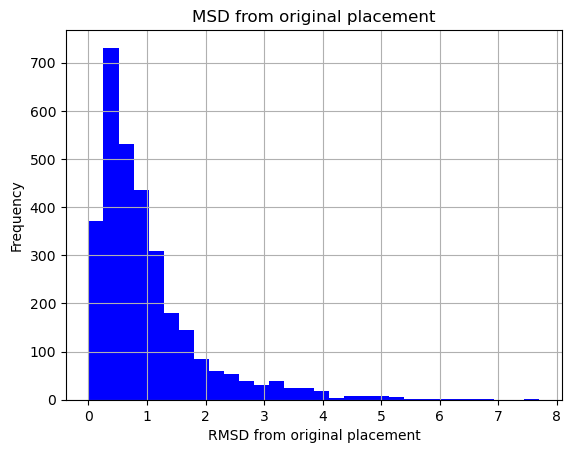

In [21]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('RMSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [22]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

3075

In [23]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.9862091084028223

In [24]:
systems_with_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
2665957,/scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z1638711304/placements/7l1u_receptor_only_Z1638711304_39_7.pdb,-10.362272,-11.747045,1.384773,6.0,7.0,-1.0,2.0,2.0,0.0,0.500000,0.714286,-0.214286,0,0,0.0,0.000000,0.000000,0.000000,2.375873,100,-97.624127,-5.5,0,-5.5,2.411665,0,2.411665,-2.574734,97.967241,-100.541975,0.795602,0.6,NaN
2748792,/scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z2228465286_7_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z2228465286/placements/7l1u_receptor_only_Z2228465286_229_8.pdb,-9.792328,-10.597186,0.804858,6.0,6.0,0.0,2.0,2.0,0.0,0.500000,0.500000,0.000000,1,1,0.0,-0.184216,-0.966826,0.782610,2.255346,100,-97.744654,-6.1,0,-6.1,4.015301,0,4.015301,-0.305896,97.935988,-98.241884,0.379917,0.2,NaN
2935629,/scratch/abgvg9/discovery_results/top_1000_placement/1/placements/7l1u_receptor_only_Z4665830190_3_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z4665830190/placements/7l1u_receptor_only_Z4665830190_3_3.pdb,-9.616098,-9.789080,0.172982,6.0,6.0,0.0,2.0,1.0,1.0,0.500000,0.500000,0.000000,2,2,0.0,-0.785744,-0.645986,-0.139758,2.265781,100,-97.734219,-6.0,0,-6.0,4.252505,0,4.252505,0.616444,99.064934,-98.448490,0.364360,0.2,NaN
2953426,/scratch/abgvg9/discovery_results/top_1000_placement/1/placements/7l1u_receptor_only_Z741169262_3_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z741169262/placements/7l1u_receptor_only_Z741169262_19_3.pdb,-11.713877,-11.779037,0.065160,6.0,6.0,0.0,2.0,2.0,0.0,0.666667,0.500000,0.166667,1,1,0.0,-0.634180,-1.004726,0.370546,2.101627,100,-97.898373,-5.8,0,-5.8,5.800397,0,5.800397,-0.579366,96.716237,-97.295603,0.722185,0.2,NaN
2938456,/scratch/abgvg9/discovery_results/top_1000_placement/100/placements/7l1u_receptor_only_Z5042978486_5_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z5042978486/placements/7l1u_receptor_only_Z5042978486_191_1.pdb,-10.664893,-10.629452,-0.035441,7.0,7.0,0.0,3.0,3.0,0.0,0.571429,0.285714,0.285715,0,0,0.0,0.000000,0.000000,0.000000,0.785108,100,-99.214892,-7.5,0,-7.5,1.921063,0,1.921063,-4.887293,99.656262,-104.543555,2.754106,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159327,/scratch/abgvg9/discovery_results/top_1000_placement/9979/placements/7l1u_receptor_only_PV-006690711690_5_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-006690711690/placements/7l1u_receptor_only_PV-006690711690_192_1.pdb,-9.685475,-10.821458,1.135983,6.0,6.0,0.0,3.0,3.0,0.0,0.500000,0.333333,0.166667,2,2,0.0,-1.055421,-1.325068,0.269647,1.509646,100,-98.490354,-7.6,0,-7.6,5.963923,0,5.963923,0.632673,99.186807,-98.554134,2.588760,0.2,NaN
2159735,/scratch/abgvg9/discovery_results/top_1000_placement/

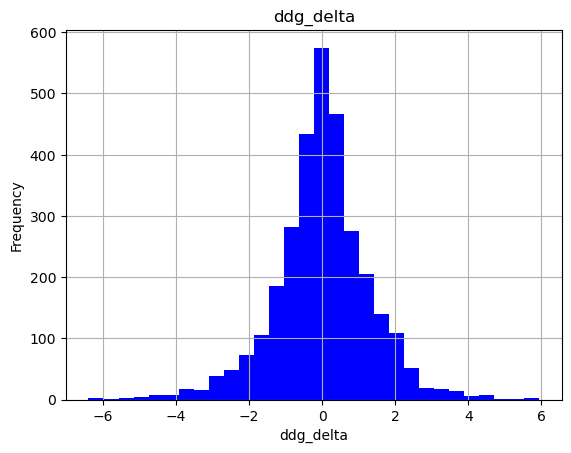

In [25]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [26]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

43

In [27]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.013790891597177678

In [28]:
systems_without_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
2209450,/scratch/abgvg9/discovery_results/top_1000_placement/10293/placements/7l1u_receptor_only_PV-006694498724_4_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-006694498724/placements/7l1u_receptor_only_PV-006694498724_220_1.pdb,-10.651438,-11.024172,0.372734,6.0,9.0,-3.0,1.0,2.0,-1.0,0.500000,0.111111,0.388889,0,3,-3.0,0.000000,-2.069901,2.069901,1.538926,100,-98.461074,-8.7,0,-8.7,4.181136,0,4.181136,-6.131376,101.017038,-107.148414,4.693962,0.8,NaN
2349707,/scratch/abgvg9/discovery_results/top_1000_placement/10967/placements/7l1u_receptor_only_PV-006702749918_14_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-006702749918/placements/7l1u_receptor_only_PV-006702749918_1_2.pdb,-9.608967,-11.541477,1.932510,6.0,8.0,-2.0,1.0,1.0,0.0,0.500000,0.625000,-0.125000,0,1,-1.0,0.000000,-0.477019,0.477019,1.782242,100,-98.217758,-8.6,0,-8.6,3.725703,0,3.725703,-5.201022,98.606504,-103.807526,5.004331,0.8,NaN
2399424,/scratch/abgvg9/discovery_results/top_1000_placement/11217/placements/7l1u_receptor_only_PV-006705775565_1_4.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-006705775565/placements/7l1u_receptor_only_PV-006705775565_1_0.pdb,-14.212593,-14.424531,0.211938,6.0,6.0,0.0,1.0,1.0,0.0,0.500000,0.333333,0.166667,0,0,0.0,0.000000,0.000000,0.000000,2.046574,100,-97.953426,-8.2,0,-8.2,6.576290,0,6.576290,-6.289729,92.908802,-99.198531,6.466893,0.2,NaN
2461577,/scratch/abgvg9/discovery_results/top_1000_placement/11464/placements/7l1u_receptor_only_PV-006708722791_7_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-006708722791/placements/7l1u_receptor_only_PV-006708722791_101_0.pdb,-10.480637,-10.468588,-0.012049,6.0,10.0,-4.0,1.0,3.0,-2.0,0.500000,0.200000,0.300000,0,1,-1.0,0.000000,-0.464495,0.464495,1.329530,100,-98.670470,-7.0,0,-7.0,1.327828,0,1.327828,-7.323278,103.266917,-110.590195,5.141654,0.6,NaN
2530344,/scratch/abgvg9/discovery_results/top_1000_placement/11821/placements/7l1u_receptor_only_PV-006713019408_13_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-006713019408/placements/7l1u_receptor_only_PV-006713019408_1_0.pdb,-10.137222,-12.366214,2.228992,6.0,8.0,-2.0,2.0,2.0,0.0,0.500000,0.125000,0.375000,0,1,-1.0,0.000000,-0.683586,0.683586,2.156956,100,-97.843044,-7.3,0,-7.3,5.439273,0,5.439273,-1.340994,98.075200,-99.416194,5.785463,0.6,NaN
2544507,/scratch/abgvg9/discovery_results/top_1000_placement/11892/placements/7l1u_receptor_only_PV-006713852284_14_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-006713852284/placements/7l1u_receptor_only_PV-006713852284_53_10.pdb,-9.115570,-12.678217,3.562647,6.0,7.0,-1.0,1.0,2.0,-1.0,0.500000,0.285714,0.214286,0,1,-1.0,0.000000,-0.738880,0.738880,1.873692,100,-98.126308,-7.3,0,-7.3,13.009079,0,13.009079,5.967200,96.868617,-90.901417,4.737137,0.8,NaN
420283,/scratch/abgvg9/discovery_results/top_1000_placement/1511/placements/7l1u_receptor_only_PV-0043507

In [29]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
5833,/scratch/abgvg9/discovery_results/top_1000_placement/11327/placements/7l1u_receptor_only_PV-000239407773_4_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000239407773/placements/7l1u_receptor_only_PV-000239407773_85_3.pdb,-11.590171,-13.928575,2.338404,6.0,8.0,-2.0,2.0,3.0,-1.0,0.5,0.625000,-0.125000,0,1,-1.0,0.000000,-0.498225,0.498225,1.835336,100,-98.164664,-8.5,0,-8.5,3.074045,0,3.074045,-6.680790,98.198200,-104.878990,1.396996,1.0,NaN
6101,/scratch/abgvg9/discovery_results/top_1000_placement/11327/placements/7l1u_receptor_only_PV-000239407773_4_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000239407773/placements/7l1u_receptor_only_PV-000239407773_85_3.pdb,-11.590171,-13.928575,2.338404,6.0,8.0,-2.0,2.0,3.0,-1.0,0.5,0.625000,-0.125000,0,1,-1.0,0.000000,-0.498225,0.498225,1.835336,100,-98.164664,-8.5,0,-8.5,3.074045,0,3.074045,-6.680790,98.198200,-104.878990,1.396996,1.0,NaN
20533,/scratch/abgvg9/discovery_results/top_1000_placement/6791/placements/7l1u_receptor_only_PV-000357097184_11_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000357097184/placements/7l1u_receptor_only_PV-000357097184_123_3.pdb,-9.206816,-9.392202,0.185386,6.0,9.0,-3.0,2.0,3.0,-1.0,0.5,0.555556,-0.055556,0,1,-1.0,0.000000,-0.083344,0.083344,1.392318,100,-98.607682,-7.8,0,-7.8,6.843647,0,6.843647,-0.270851,104.080010,-104.350861,3.463988,1.0,NaN
20566,/scratch/abgvg9/discovery_results/top_1000_placement/6791/placements/7l1u_receptor_only_PV-000357097184_11_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000357097184/placements/7l1u_receptor_only_PV-000357097184_123_3.pdb,-9.206816,-9.392202,0.185386,6.0,9.0,-3.0,2.0,3.0,-1.0,0.5,0.555556,-0.055556,0,1,-1.0,0.000000,-0.083344,0.083344,1.392318,100,-98.607682,-7.8,0,-7.8,6.843647,0,6.843647,-0.270851,104.080010,-104.350861,3.463988,1.0,NaN
31488,/scratch/abgvg9/discovery_results/top_1000_placement/8565/placements/7l1u_receptor_only_PV-000490180656_8_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000490180656/placements/7l1u_receptor_only_PV-000490180656_175_2.pdb,-14.513160,-17.474091,2.960931,6.0,9.0,-3.0,2.0,4.0,-2.0,0.5,0.555556,-0.055556,0,1,-1.0,0.000000,-0.955649,0.955649,0.393382,100,-99.606618,-9.8,0,-9.8,1.620380,0,1.620380,-13.799399,96.125816,-109.925215,2.801704,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971542,/scratch/abgvg9/discovery_results/top_1000_placement/2744/placements/7l1u_receptor_only_Z929537814_2_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z929537814/placements/7l1u_receptor_only_Z929537814_135_3.pdb,-14.811948,-15.592671,0.780723,8.0,9.0,-1.0,1.0,2.0,-1.0,0.5,0.555556,-0.055556,0,1,-1.0,0.000000,-0.779796,0.779796,1.842768,100,-98.157232,-10.2,0,-10.2,4.910609,0,4.910609,-8.758571,96.183089,-104.941660,4.419118,1.0,NaN
2972512

In [30]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
785,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_105_15.pdb,-9.867297,-11.503081,1.635784,6.0,10.0,-4.0,3.0,4.0,-1.0,0.5,0.100000,0.400000,1,2,-1.0,-0.273155,-0.142236,-0.130919,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,104.454683,-104.415873,5.557380,0.8,NaN
3334,/scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_105_15.pdb,-9.867297,-11.503081,1.635784,6.0,10.0,-4.0,3.0,4.0,-1.0,0.5,0.100000,0.400000,1,2,-1.0,-0.273155,-0.142236,-0.130919,1.342411,100,-98.657589,-8.4,0,-8.4,6.736851,0,6.736851,0.038810,104.454683,-104.415873,5.557380,0.8,NaN
3384,/scratch/abgvg9/discovery_results/top_1000_placement/11974/placements/7l1u_receptor_only_PV-000233470449_13_13.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470449/placements/7l1u_receptor_only_PV-000233470449_98_45.pdb,-9.760978,-11.213769,1.452791,6.0,12.0,-6.0,3.0,4.0,-1.0,0.5,0.250000,0.250000,1,2,-1.0,-0.355762,-0.821688,0.465926,1.953617,100,-98.046383,-8.7,0,-8.7,6.826468,0,6.826468,0.463345,106.214543,-105.751198,5.675622,0.8,NaN
4280,/scratch/abgvg9/discovery_results/top_1000_placement/11974/placements/7l1u_receptor_only_PV-000233470449_13_13.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470449/placements/7l1u_receptor_only_PV-000233470449_114_11.pdb,-9.760978,-10.827560,1.066582,6.0,11.0,-5.0,3.0,4.0,-1.0,0.5,0.454545,0.045455,1,2,-1.0,-0.355762,-0.160688,-0.195074,1.953617,100,-98.046383,-8.7,0,-8.7,6.826468,0,6.826468,0.463345,106.466297,-106.002952,5.730099,0.8,NaN
4362,/scratch/abgvg9/discovery_results/top_1000_placement/11974/placements/7l1u_receptor_only_PV-000233470449_13_13.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000233470449/placements/7l1u_receptor_only_PV-000233470449_82_24.pdb,-9.760978,-15.476376,5.715398,6.0,9.0,-3.0,3.0,4.0,-1.0,0.5,0.111111,0.388889,1,2,-1.0,-0.355762,-1.922528,1.566766,1.953617,100,-98.046383,-8.7,0,-8.7,6.826468,0,6.826468,0.463345,97.712207,-97.248862,4.908952,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976422,/scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z993458444/placements/7l1u_receptor_only_Z993458444_123_0.pdb,-11.053889,-11.351118,0.297229,6.0,10.0,-4.0,2.0,3.0,-1.0,0.5,0.300000,0.200000,1,2,-1.0,-0.651695,-1.019776,0.368081,3.245163,100,-96.754837,-7.2,0,-7.2,6.765364,0,6.765364,0.604942,102.929106,-102.324164,3.211320,0.8,Na

In [71]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -15) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


183

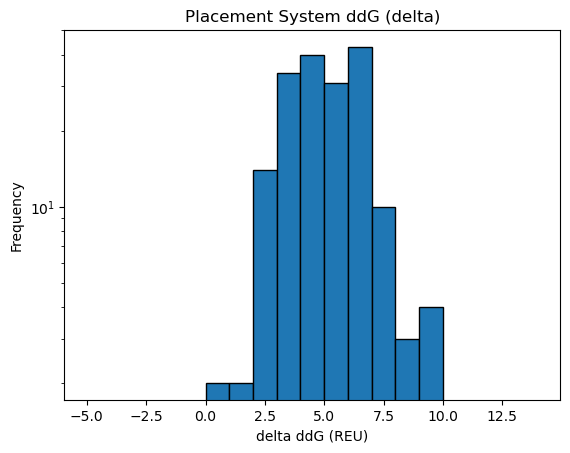

In [72]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-5, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

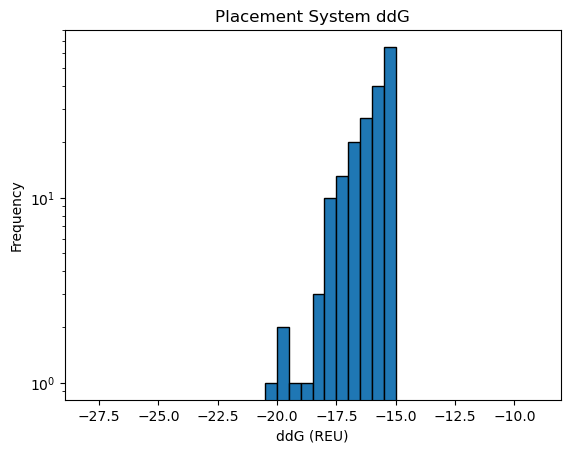

In [73]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

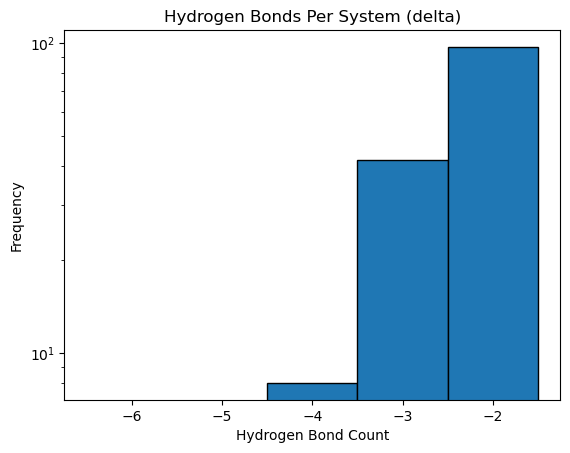

In [85]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-6.5, -0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

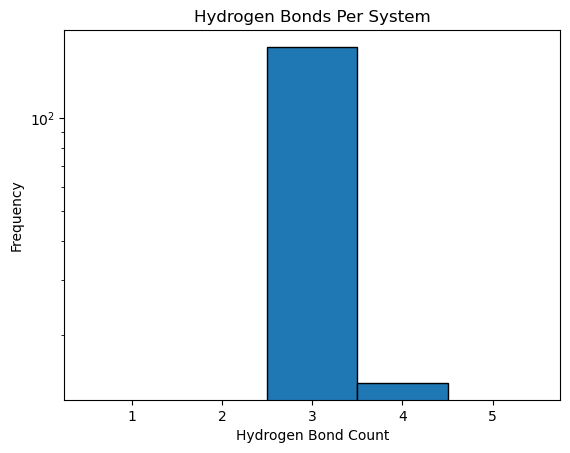

In [83]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.5, 6, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

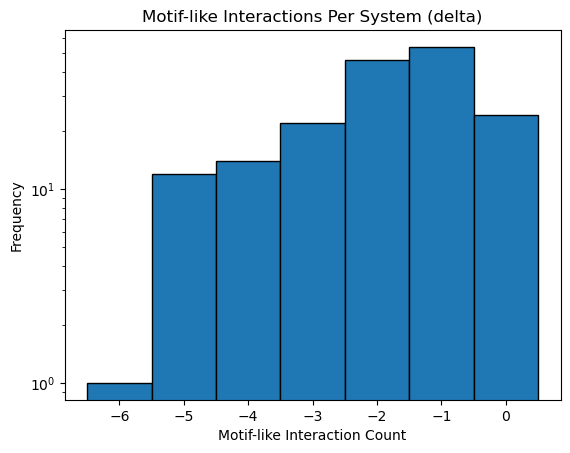

In [76]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

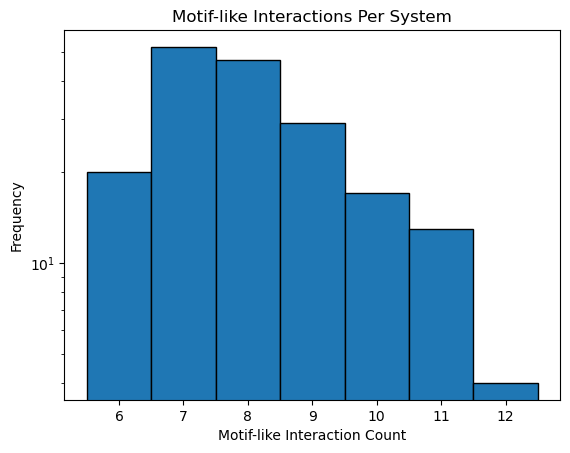

In [77]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

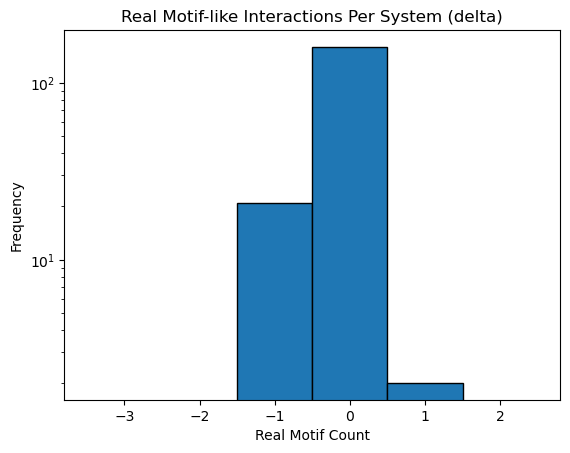

In [86]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta'] * df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-3.5, 3, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

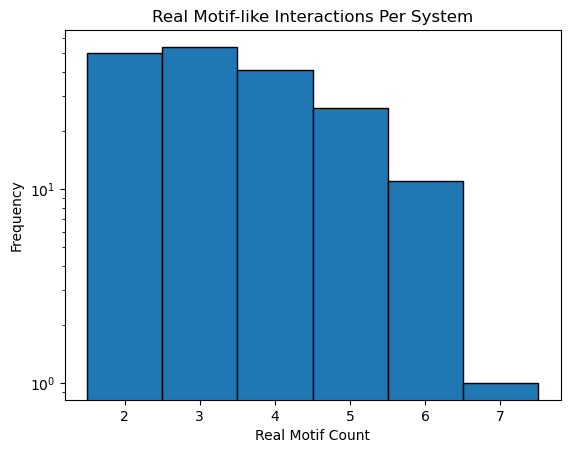

In [79]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare'] * df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

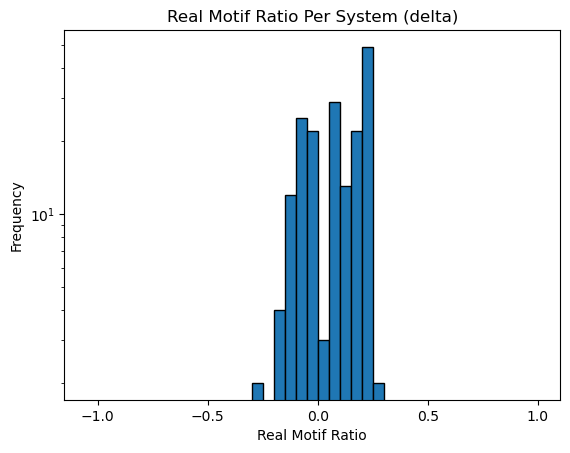

In [80]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

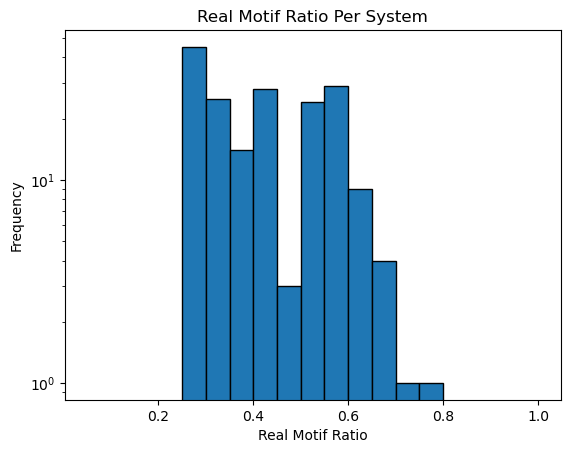

In [81]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

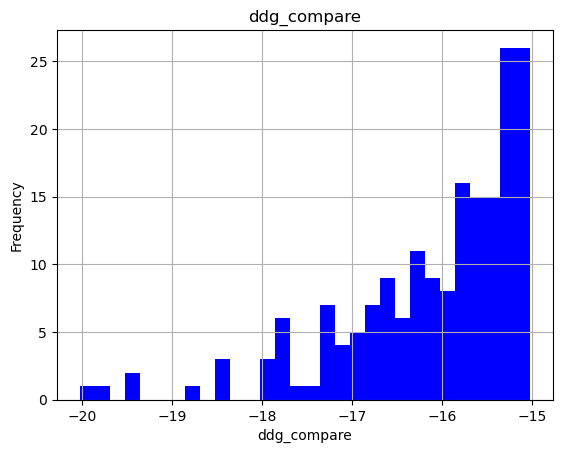

In [47]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddg_compare')
plt.ylabel('Frequency')
plt.title('ddg_compare')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [48]:
df_general_high_hbonds

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
62143,/scratch/abgvg9/discovery_results/top_1000_placement/10370/placements/7l1u_receptor_only_PV-000576157088_3_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-000576157088/placements/7l1u_receptor_only_PV-000576157088_142_1.pdb,-10.672614,-15.325175,4.652561,6.0,7.0,-1.0,2.0,2.0,0.0,0.500000,0.285714,0.214286,1,3,-2.0,-0.790887,-2.043324,1.252437,2.276808,100,-97.723192,-8.4,0,-8.4,6.467929,0,6.467929,-1.618764,94.917215,-96.535979,1.544449,0.6,NaN
78829,/scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_7.pdb,-13.255910,-17.328808,4.072898,6.0,7.0,-1.0,2.0,2.0,0.0,0.500000,0.571429,-0.071429,1,3,-2.0,-0.536478,-1.965986,1.429508,1.925098,100,-98.074902,-8.0,0,-8.0,7.013526,0,7.013526,-3.353764,93.276635,-96.630399,2.188407,0.8,NaN
79988,/scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_5.pdb,-13.255910,-17.854515,4.598605,6.0,6.0,0.0,2.0,2.0,0.0,0.500000,0.500000,0.000000,1,3,-2.0,-0.536478,-2.284469,1.747991,1.925098,100,-98.074902,-8.0,0,-8.0,7.013526,0,7.013526,-3.353764,91.361016,-94.714780,2.277335,0.4,NaN
82018,/scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_7.pdb,-13.771227,-17.328808,3.557581,7.0,7.0,0.0,2.0,2.0,0.0,0.571429,0.571429,0.000000,1,3,-2.0,-0.976463,-1.965986,0.989523,1.772197,100,-98.227803,-8.2,0,-8.2,6.968777,0,6.968777,-3.635287,93.276635,-96.911922,1.934915,0.4,NaN
83177,/scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_5.pdb,-13.771227,-17.854515,4.083288,7.0,6.0,1.0,2.0,2.0,0.0,0.571429,0.500000,0.071429,1,3,-2.0,-0.976463,-2.284469,1.308006,1.772197,100,-98.227803,-8.2,0,-8.2,6.968777,0,6.968777,-3.635287,91.361016,-94.996303,2.036213,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950976,/scratch/abgvg9/discovery_results/top_1000_placement/1406/placements/7l1u_receptor_only_Z740295064_1_7.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_real/Z740295064/placements/7l1u_receptor_only_Z740295064_153_9.pdb,-9.086474,-15.538786,6.452312,8.0,8.0,0.0,2.0,2.0,0.0,0.500000,0.500000,0.000000,2,3,-1.0,-0.955962,-0.704878,-0.251084,2.270511,100,-97.729489,-7.0,0,-7.0,11.540385,0,11.540385,9.268461,97.256336,-87.987875,2.27

In [49]:
len(df_general_high_hbonds)

183

In [50]:
# Extract ligand names using a regular expression
df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_general_high_hbonds['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000576157088' 'PV-001051314575' 'PV-001625470497' 'PV-001703649704'
 'PV-001706209823' 'PV-002136162040' 'PV-003506768917' 'PV-003725252339'
 'PV-004435004691' 'PV-004504869303' 'PV-005431341290' 'PV-005602389067'
 'PV-005718134777' 'PV-005841322880' 'PV-006130153580' 'PV-006198753977'
 'PV-006608076951' 'PV-006610816392' 'PV-006612138035' 'PV-006615970627'
 'PV-006616861595' 'PV-006619223624' 'PV-006622081845' 'PV-006627891221'
 'PV-006629622972' 'PV-006629953849' 'PV-006637145687' 'PV-006637568928'
 'PV-006640781836' 'PV-006641304251' 'PV-006643882550' 'PV-006644865799'
 'PV-006648110646' 'PV-006648412119' 'PV-006648861636' 'PV-006650418029'
 'PV-006653279699' 'PV-006654881375' 'PV-006656190255' 'PV-006657450587'
 'PV-006660262767' 'PV-006661198599' 'PV-006663086633' 'PV-006666022285'
 'PV-006666376453' 'PV-006668031637' 'PV-006668579529' 'PV-006669822259'
 'PV-006676701768' 'PV-006679073469' 'PV-006680024500' 'PV-006680046115'
 'PV-006680991440' 'PV-0066886

/scratch/local/ipykernel_278188/4240062569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')


In [51]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [52]:
line_counter = 0
folder_counter = 0

destination = "/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_general_high_hbonds.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv(destination + 'agonist_real_and_hbond_best_improved_placements_sheet.csv', index=False)

00000_initial_7l1u_receptor_only_PV-000576157088_3_0.pdb 00000_compare_7l1u_receptor_only_PV-000576157088_142_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00001_initial_7l1u_receptor_only_PV-001051314575_13_3.pdb 00001_compare_7l1u_receptor_only_PV-001051314575_210_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00002_initial_7l1u_receptor_only_PV-001051314575_13_3.pdb 00002_compare_7l1u_receptor_only_PV-001051314575_210_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00003_initial_7l1u_receptor_only_PV-001051314575_13_2.pdb 00003_compare_7l1u_receptor_only_PV-001051314575_210_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00004_initial_7l1u_receptor_only_PV-001051314575_13_2.pdb 00004_compare_7l1u_receptor_only_PV-001051314575_210_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00005_initial_7l1u_receptor_only_PV-001625470497_9_11.pdb 00005_compare_7l1u_receptor_only_PV-001625470497_7_3.pdb
00006_initial_7l1u_receptor_only_PV-001625470497_9_11.pdb 00006_compare_7l1u_receptor_only_PV-001625470497_7_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00007_initial_7l1u_receptor_only_PV-001703649704_6_0.pdb 00007_compare_7l1u_receptor_only_PV-001703649704_77_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00008_initial_7l1u_receptor_only_PV-001706209823_9_3.pdb 00008_compare_7l1u_receptor_only_PV-001706209823_223_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00009_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00009_compare_7l1u_receptor_only_PV-002136162040_181_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00010_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00010_compare_7l1u_receptor_only_PV-002136162040_198_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00011_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00011_compare_7l1u_receptor_only_PV-002136162040_198_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00012_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00012_compare_7l1u_receptor_only_PV-002136162040_198_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00013_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00013_compare_7l1u_receptor_only_PV-002136162040_198_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00014_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00014_compare_7l1u_receptor_only_PV-002136162040_181_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00015_initial_7l1u_receptor_only_PV-003506768917_6_12.pdb 00015_compare_7l1u_receptor_only_PV-003506768917_134_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00016_initial_7l1u_receptor_only_PV-003725252339_4_2.pdb 00016_compare_7l1u_receptor_only_PV-003725252339_150_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00017_initial_7l1u_receptor_only_PV-003725252339_4_2.pdb 00017_compare_7l1u_receptor_only_PV-003725252339_150_1.pdb
00018_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00018_compare_7l1u_receptor_only_PV-004435004691_10_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00019_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00019_compare_7l1u_receptor_only_PV-004435004691_9_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00020_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00020_compare_7l1u_receptor_only_PV-004435004691_8_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00021_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00021_compare_7l1u_receptor_only_PV-004435004691_10_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00022_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00022_compare_7l1u_receptor_only_PV-004435004691_9_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00023_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00023_compare_7l1u_receptor_only_PV-004435004691_8_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00024_initial_7l1u_receptor_only_PV-004504869303_15_1.pdb 00024_compare_7l1u_receptor_only_PV-004504869303_134_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00025_initial_7l1u_receptor_only_PV-004504869303_15_1.pdb 00025_compare_7l1u_receptor_only_PV-004504869303_242_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00026_initial_7l1u_receptor_only_PV-004504869303_15_1.pdb 00026_compare_7l1u_receptor_only_PV-004504869303_245_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00027_initial_7l1u_receptor_only_PV-004504869303_15_1.pdb 00027_compare_7l1u_receptor_only_PV-004504869303_245_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00028_initial_7l1u_receptor_only_PV-005431341290_12_1.pdb 00028_compare_7l1u_receptor_only_PV-005431341290_176_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00029_initial_7l1u_receptor_only_PV-005602389067_13_2.pdb 00029_compare_7l1u_receptor_only_PV-005602389067_239_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00030_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00030_compare_7l1u_receptor_only_PV-005718134777_141_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00031_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00031_compare_7l1u_receptor_only_PV-005718134777_160_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00032_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00032_compare_7l1u_receptor_only_PV-005718134777_159_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00033_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00033_compare_7l1u_receptor_only_PV-005718134777_141_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00034_initial_7l1u_receptor_only_PV-005841322880_9_0.pdb 00034_compare_7l1u_receptor_only_PV-005841322880_165_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00035_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00035_compare_7l1u_receptor_only_PV-006130153580_115_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00036_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00036_compare_7l1u_receptor_only_PV-006130153580_117_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00037_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00037_compare_7l1u_receptor_only_PV-006130153580_111_19.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00038_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00038_compare_7l1u_receptor_only_PV-006130153580_115_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00039_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00039_compare_7l1u_receptor_only_PV-006130153580_111_13.pdb
00040_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00040_compare_7l1u_receptor_only_PV-006130153580_177_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00041_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00041_compare_7l1u_receptor_only_PV-006130153580_111_19.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00042_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00042_compare_7l1u_receptor_only_PV-006130153580_177_14.pdb
00043_initial_7l1u_receptor_only_PV-006198753977_12_2.pdb 00043_compare_7l1u_receptor_only_PV-006198753977_221_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00044_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00044_compare_7l1u_receptor_only_PV-006608076951_171_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00045_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00045_compare_7l1u_receptor_only_PV-006608076951_171_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00046_initial_7l1u_receptor_only_PV-006610816392_5_0.pdb 00046_compare_7l1u_receptor_only_PV-006610816392_33_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00047_initial_7l1u_receptor_only_PV-006610816392_5_0.pdb 00047_compare_7l1u_receptor_only_PV-006610816392_33_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00048_initial_7l1u_receptor_only_PV-006612138035_15_2.pdb 00048_compare_7l1u_receptor_only_PV-006612138035_72_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/0’: File exists


00049_initial_7l1u_receptor_only_PV-006612138035_15_2.pdb 00049_compare_7l1u_receptor_only_PV-006612138035_111_12.pdb
00050_initial_7l1u_receptor_only_PV-006612138035_15_6.pdb 00050_compare_7l1u_receptor_only_PV-006612138035_72_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00051_initial_7l1u_receptor_only_PV-006612138035_15_6.pdb 00051_compare_7l1u_receptor_only_PV-006612138035_111_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00052_initial_7l1u_receptor_only_PV-006615970627_5_3.pdb 00052_compare_7l1u_receptor_only_PV-006615970627_234_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00053_initial_7l1u_receptor_only_PV-006615970627_5_3.pdb 00053_compare_7l1u_receptor_only_PV-006615970627_234_1.pdb
00054_initial_7l1u_receptor_only_PV-006616861595_10_1.pdb 00054_compare_7l1u_receptor_only_PV-006616861595_208_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00055_initial_7l1u_receptor_only_PV-006619223624_6_0.pdb 00055_compare_7l1u_receptor_only_PV-006619223624_196_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00056_initial_7l1u_receptor_only_PV-006619223624_6_0.pdb 00056_compare_7l1u_receptor_only_PV-006619223624_34_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00057_initial_7l1u_receptor_only_PV-006622081845_5_1.pdb 00057_compare_7l1u_receptor_only_PV-006622081845_18_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00058_initial_7l1u_receptor_only_PV-006627891221_13_1.pdb 00058_compare_7l1u_receptor_only_PV-006627891221_235_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00059_initial_7l1u_receptor_only_PV-006627891221_13_1.pdb 00059_compare_7l1u_receptor_only_PV-006627891221_183_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00060_initial_7l1u_receptor_only_PV-006629622972_5_0.pdb 00060_compare_7l1u_receptor_only_PV-006629622972_97_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00061_initial_7l1u_receptor_only_PV-006629953849_11_1.pdb 00061_compare_7l1u_receptor_only_PV-006629953849_127_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00062_initial_7l1u_receptor_only_PV-006629953849_11_1.pdb 00062_compare_7l1u_receptor_only_PV-006629953849_127_2.pdb
00063_initial_7l1u_receptor_only_PV-006637145687_12_1.pdb 00063_compare_7l1u_receptor_only_PV-006637145687_137_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00064_initial_7l1u_receptor_only_PV-006637145687_12_1.pdb 00064_compare_7l1u_receptor_only_PV-006637145687_70_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00065_initial_7l1u_receptor_only_PV-006637568928_6_2.pdb 00065_compare_7l1u_receptor_only_PV-006637568928_160_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00066_initial_7l1u_receptor_only_PV-006637568928_6_2.pdb 00066_compare_7l1u_receptor_only_PV-006637568928_132_2.pdb
00067_initial_7l1u_receptor_only_PV-006637568928_6_2.pdb 00067_compare_7l1u_receptor_only_PV-006637568928_132_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00068_initial_7l1u_receptor_only_PV-006640781836_5_4.pdb 00068_compare_7l1u_receptor_only_PV-006640781836_29_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00069_initial_7l1u_receptor_only_PV-006640781836_5_4.pdb 00069_compare_7l1u_receptor_only_PV-006640781836_29_0.pdb
00070_initial_7l1u_receptor_only_PV-006641304251_7_1.pdb 00070_compare_7l1u_receptor_only_PV-006641304251_81_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00071_initial_7l1u_receptor_only_PV-006641304251_7_1.pdb 00071_compare_7l1u_receptor_only_PV-006641304251_81_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00072_initial_7l1u_receptor_only_PV-006643882550_4_0.pdb 00072_compare_7l1u_receptor_only_PV-006643882550_88_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00073_initial_7l1u_receptor_only_PV-006644865799_9_0.pdb 00073_compare_7l1u_receptor_only_PV-006644865799_12_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00074_initial_7l1u_receptor_only_PV-006644865799_9_0.pdb 00074_compare_7l1u_receptor_only_PV-006644865799_12_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00075_initial_7l1u_receptor_only_PV-006648110646_3_1.pdb 00075_compare_7l1u_receptor_only_PV-006648110646_114_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00076_initial_7l1u_receptor_only_PV-006648412119_11_19.pdb 00076_compare_7l1u_receptor_only_PV-006648412119_62_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00077_initial_7l1u_receptor_only_PV-006648861636_10_5.pdb 00077_compare_7l1u_receptor_only_PV-006648861636_109_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00078_initial_7l1u_receptor_only_PV-006650418029_9_1.pdb 00078_compare_7l1u_receptor_only_PV-006650418029_65_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00079_initial_7l1u_receptor_only_PV-006653279699_7_4.pdb 00079_compare_7l1u_receptor_only_PV-006653279699_150_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00080_initial_7l1u_receptor_only_PV-006653279699_7_4.pdb 00080_compare_7l1u_receptor_only_PV-006653279699_150_4.pdb
00081_initial_7l1u_receptor_only_PV-006654881375_4_0.pdb 00081_compare_7l1u_receptor_only_PV-006654881375_37_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00082_initial_7l1u_receptor_only_PV-006656190255_7_1.pdb 00082_compare_7l1u_receptor_only_PV-006656190255_218_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00083_initial_7l1u_receptor_only_PV-006657450587_2_1.pdb 00083_compare_7l1u_receptor_only_PV-006657450587_200_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00084_initial_7l1u_receptor_only_PV-006657450587_2_0.pdb 00084_compare_7l1u_receptor_only_PV-006657450587_200_2.pdb
00085_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00085_compare_7l1u_receptor_only_PV-006660262767_32_34.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00086_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00086_compare_7l1u_receptor_only_PV-006660262767_92_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00087_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00087_compare_7l1u_receptor_only_PV-006660262767_201_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00088_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00088_compare_7l1u_receptor_only_PV-006660262767_204_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00089_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00089_compare_7l1u_receptor_only_PV-006660262767_42_1.pdb
00090_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00090_compare_7l1u_receptor_only_PV-006660262767_157_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00091_initial_7l1u_receptor_only_PV-006661198599_5_0.pdb 00091_compare_7l1u_receptor_only_PV-006661198599_81_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00092_initial_7l1u_receptor_only_PV-006663086633_11_1.pdb 00092_compare_7l1u_receptor_only_PV-006663086633_223_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00093_initial_7l1u_receptor_only_PV-006663086633_11_1.pdb 00093_compare_7l1u_receptor_only_PV-006663086633_223_19.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00094_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00094_compare_7l1u_receptor_only_PV-006666022285_82_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00095_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00095_compare_7l1u_receptor_only_PV-006666022285_36_17.pdb
00096_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00096_compare_7l1u_receptor_only_PV-006666022285_5_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00097_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00097_compare_7l1u_receptor_only_PV-006666022285_1_10.pdb
00098_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00098_compare_7l1u_receptor_only_PV-006666022285_5_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/1’: File exists


00099_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00099_compare_7l1u_receptor_only_PV-006666022285_82_20.pdb
00100_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00100_compare_7l1u_receptor_only_PV-006666022285_76_25.pdb
00101_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00101_compare_7l1u_receptor_only_PV-006666022285_103_23.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00102_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00102_compare_7l1u_receptor_only_PV-006666022285_20_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00103_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00103_compare_7l1u_receptor_only_PV-006666022285_82_24.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00104_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00104_compare_7l1u_receptor_only_PV-006666022285_1_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00105_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00105_compare_7l1u_receptor_only_PV-006666022285_36_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00106_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00106_compare_7l1u_receptor_only_PV-006666022285_1_10.pdb
00107_initial_7l1u_receptor_only_PV-006666376453_2_3.pdb 00107_compare_7l1u_receptor_only_PV-006666376453_217_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00108_initial_7l1u_receptor_only_PV-006668031637_13_0.pdb 00108_compare_7l1u_receptor_only_PV-006668031637_21_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00109_initial_7l1u_receptor_only_PV-006668579529_2_0.pdb 00109_compare_7l1u_receptor_only_PV-006668579529_21_23.pdb
00110_initial_7l1u_receptor_only_PV-006668579529_2_0.pdb 00110_compare_7l1u_receptor_only_PV-006668579529_31_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00111_initial_7l1u_receptor_only_PV-006668579529_2_0.pdb 00111_compare_7l1u_receptor_only_PV-006668579529_21_23.pdb
00112_initial_7l1u_receptor_only_PV-006669822259_4_2.pdb 00112_compare_7l1u_receptor_only_PV-006669822259_112_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00113_initial_7l1u_receptor_only_PV-006669822259_4_2.pdb 00113_compare_7l1u_receptor_only_PV-006669822259_96_2.pdb
00114_initial_7l1u_receptor_only_PV-006669822259_4_2.pdb 00114_compare_7l1u_receptor_only_PV-006669822259_96_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00115_initial_7l1u_receptor_only_PV-006676701768_6_2.pdb 00115_compare_7l1u_receptor_only_PV-006676701768_150_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00116_initial_7l1u_receptor_only_PV-006679073469_10_0.pdb 00116_compare_7l1u_receptor_only_PV-006679073469_48_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00117_initial_7l1u_receptor_only_PV-006680024500_8_4.pdb 00117_compare_7l1u_receptor_only_PV-006680024500_32_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00118_initial_7l1u_receptor_only_PV-006680024500_8_4.pdb 00118_compare_7l1u_receptor_only_PV-006680024500_32_2.pdb
00119_initial_7l1u_receptor_only_PV-006680046115_6_2.pdb 00119_compare_7l1u_receptor_only_PV-006680046115_78_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00120_initial_7l1u_receptor_only_PV-006680046115_6_2.pdb 00120_compare_7l1u_receptor_only_PV-006680046115_39_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00121_initial_7l1u_receptor_only_PV-006680991440_2_0.pdb 00121_compare_7l1u_receptor_only_PV-006680991440_148_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00122_initial_7l1u_receptor_only_PV-006688669851_15_0.pdb 00122_compare_7l1u_receptor_only_PV-006688669851_121_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00123_initial_7l1u_receptor_only_PV-006688669851_15_0.pdb 00123_compare_7l1u_receptor_only_PV-006688669851_157_0.pdb
00124_initial_7l1u_receptor_only_PV-006689746410_15_0.pdb 00124_compare_7l1u_receptor_only_PV-006689746410_50_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00125_initial_7l1u_receptor_only_PV-006689746410_15_0.pdb 00125_compare_7l1u_receptor_only_PV-006689746410_50_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00126_initial_7l1u_receptor_only_PV-006694797341_1_3.pdb 00126_compare_7l1u_receptor_only_PV-006694797341_199_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00127_initial_7l1u_receptor_only_PV-006694797341_1_3.pdb 00127_compare_7l1u_receptor_only_PV-006694797341_200_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00128_initial_7l1u_receptor_only_PV-006694797341_1_3.pdb 00128_compare_7l1u_receptor_only_PV-006694797341_226_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00129_initial_7l1u_receptor_only_PV-006697229941_1_0.pdb 00129_compare_7l1u_receptor_only_PV-006697229941_97_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00130_initial_7l1u_receptor_only_PV-006697229941_1_0.pdb 00130_compare_7l1u_receptor_only_PV-006697229941_85_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00131_initial_7l1u_receptor_only_PV-006699497454_2_0.pdb 00131_compare_7l1u_receptor_only_PV-006699497454_66_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00132_initial_7l1u_receptor_only_PV-006699497454_2_0.pdb 00132_compare_7l1u_receptor_only_PV-006699497454_66_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00133_initial_7l1u_receptor_only_PV-006707722660_3_0.pdb 00133_compare_7l1u_receptor_only_PV-006707722660_153_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00134_initial_7l1u_receptor_only_PV-006708627569_13_3.pdb 00134_compare_7l1u_receptor_only_PV-006708627569_99_28.pdb
00135_initial_7l1u_receptor_only_PV-006708627569_13_3.pdb 00135_compare_7l1u_receptor_only_PV-006708627569_3_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00136_initial_7l1u_receptor_only_PV-006710095262_4_0.pdb 00136_compare_7l1u_receptor_only_PV-006710095262_178_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00137_initial_7l1u_receptor_only_PV-006711944624_3_0.pdb 00137_compare_7l1u_receptor_only_PV-006711944624_79_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00138_initial_7l1u_receptor_only_PV-006711944624_3_0.pdb 00138_compare_7l1u_receptor_only_PV-006711944624_139_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00139_initial_7l1u_receptor_only_PV-006711944624_3_0.pdb 00139_compare_7l1u_receptor_only_PV-006711944624_139_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00140_initial_7l1u_receptor_only_PV-006711944624_3_0.pdb 00140_compare_7l1u_receptor_only_PV-006711944624_79_3.pdb
00141_initial_7l1u_receptor_only_PV-006711944624_3_0.pdb 00141_compare_7l1u_receptor_only_PV-006711944624_139_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00142_initial_7l1u_receptor_only_PV-006711944624_3_0.pdb 00142_compare_7l1u_receptor_only_PV-006711944624_139_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00143_initial_7l1u_receptor_only_Z1622050278_2_1.pdb 00143_compare_7l1u_receptor_only_Z1622050278_118_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00144_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00144_compare_7l1u_receptor_only_Z1679037537_82_67.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00145_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00145_compare_7l1u_receptor_only_Z1679037537_17_9.pdb
00146_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00146_compare_7l1u_receptor_only_Z1679037537_67_66.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00147_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00147_compare_7l1u_receptor_only_Z1679037537_82_10.pdb
00148_initial_7l1u_receptor_only_Z1708143842_10_1.pdb 00148_compare_7l1u_receptor_only_Z1708143842_66_20.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/2’: File exists


00149_initial_7l1u_receptor_only_Z1842528386_9_0.pdb 00149_compare_7l1u_receptor_only_Z1842528386_148_4.pdb
00150_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00150_compare_7l1u_receptor_only_Z2017261328_75_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00151_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00151_compare_7l1u_receptor_only_Z2017261328_239_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00152_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00152_compare_7l1u_receptor_only_Z2017261328_208_3.pdb
00153_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00153_compare_7l1u_receptor_only_Z2017261328_192_21.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00154_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00154_compare_7l1u_receptor_only_Z2017261328_233_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00155_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00155_compare_7l1u_receptor_only_Z2017261328_192_13.pdb
00156_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00156_compare_7l1u_receptor_only_Z2017261328_239_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00157_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00157_compare_7l1u_receptor_only_Z2017261328_208_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00158_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00158_compare_7l1u_receptor_only_Z2017261328_192_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00159_initial_7l1u_receptor_only_Z394652302_13_1.pdb 00159_compare_7l1u_receptor_only_Z394652302_116_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00160_initial_7l1u_receptor_only_Z394652302_13_1.pdb 00160_compare_7l1u_receptor_only_Z394652302_116_4.pdb
00161_initial_7l1u_receptor_only_Z394652302_13_1.pdb 00161_compare_7l1u_receptor_only_Z394652302_116_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00162_initial_7l1u_receptor_only_Z394679578_14_0.pdb 00162_compare_7l1u_receptor_only_Z394679578_89_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00163_initial_7l1u_receptor_only_Z394679578_14_0.pdb 00163_compare_7l1u_receptor_only_Z394679578_89_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00164_initial_7l1u_receptor_only_Z4308074781_6_11.pdb 00164_compare_7l1u_receptor_only_Z4308074781_12_5.pdb
00165_initial_7l1u_receptor_only_Z4308074781_6_11.pdb 00165_compare_7l1u_receptor_only_Z4308074781_12_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00166_initial_7l1u_receptor_only_Z4575777865_11_7.pdb 00166_compare_7l1u_receptor_only_Z4575777865_37_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00167_initial_7l1u_receptor_only_Z4575777865_11_6.pdb 00167_compare_7l1u_receptor_only_Z4575777865_37_1.pdb
00168_initial_7l1u_receptor_only_Z4575777865_11_0.pdb 00168_compare_7l1u_receptor_only_Z4575777865_37_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00169_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00169_compare_7l1u_receptor_only_Z5052318887_217_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00170_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00170_compare_7l1u_receptor_only_Z5052318887_80_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00171_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00171_compare_7l1u_receptor_only_Z5052318887_217_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00172_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00172_compare_7l1u_receptor_only_Z5052318887_80_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00173_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00173_compare_7l1u_receptor_only_Z5052318887_98_15.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00174_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00174_compare_7l1u_receptor_only_Z5052318887_217_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists
mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00175_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00175_compare_7l1u_receptor_only_Z5052318887_217_16.pdb
00176_initial_7l1u_receptor_only_Z5063076522_3_10.pdb 00176_compare_7l1u_receptor_only_Z5063076522_114_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00177_initial_7l1u_receptor_only_Z5063076522_3_10.pdb 00177_compare_7l1u_receptor_only_Z5063076522_114_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00178_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00178_compare_7l1u_receptor_only_Z740295064_153_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00179_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00179_compare_7l1u_receptor_only_Z740295064_77_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00180_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00180_compare_7l1u_receptor_only_Z740295064_77_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


00181_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00181_compare_7l1u_receptor_only_Z740295064_167_15.pdb
00182_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00182_compare_7l1u_receptor_only_Z740295064_142_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/3’: File exists


In [81]:
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv('/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/agonist_real_and_hbond_best_improved_placements_sheet.csv', index=False)